In [2]:
import pandas as pd
import numpy as np

from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral
from feature_selection import *

In [19]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

In [20]:
final = pd.read_csv('final_dataframe.csv', index_col=False)
final

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.15-30cm.tif,PIRange_Bulkd.30-60cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Bulkd.60-100cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.100-200cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.30-60cm.tif,...,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.30-60cm.tif,Tex_Class.5-15cm.tif,Tex_Class.60-100cm.tif,Valor,PP,valor_humedad_suelo1,slope
0,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,13.532034,0.421875,32.357300
1,0.609,0.689,0.483,0.641,0.550,0.650,22.358000,32.235001,22.490000,26.009001,...,8.0,8.0,8.0,8.0,4.0,8.0,0,238.139918,0.438995,32.357300
2,0.595,0.753,0.484,0.621,0.497,0.706,23.513000,32.325001,25.268002,31.559998,...,8.0,8.0,7.0,7.0,7.0,7.0,0,32.059045,0.520004,37.497812
3,0.589,0.682,0.482,0.614,0.498,0.656,25.056000,45.129002,25.813000,32.742996,...,10.0,1.0,9.0,1.0,1.0,1.0,0,0.000000,0.478973,36.717389
4,0.659,0.689,0.573,0.675,0.553,0.660,21.844999,30.417000,18.743000,21.934999,...,8.0,4.0,8.0,8.0,8.0,4.0,0,2.191190,0.438095,60.517945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.604,0.687,0.502,0.631,0.512,0.663,25.153999,44.474998,24.527000,31.266998,...,2.0,2.0,2.0,1.0,1.0,1.0,1,48.621181,0.437820,42.533329
3144,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3145,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,66.050648,0.436722,42.533329
3146,0.587,0.701,0.478,0.612,0.556,0.676,25.213001,43.882000,24.993999,31.622002,...,2.0,2.0,2.0,2.0,2.0,1.0,1,163.471828,0.438995,42.533329


In [21]:
corr_features = [
    'alpha.0-5cm', 'ksat_0-5cm', 'PIRange_Sand.0-5cm', 'alpha_0-5cm', 
    'ksat_5-15cm', 'PIRange_Sand.15-30cm', 'alpha_5-15cm', 'ksat_15-30cm', 
    'PIRange_Sand.60-100cm', 'alpha_15-30cm', 'ksat_60-100cm', 'PP', 
    'AvMoist.0-5cm', 'ksat_100-200cm', 'PWP.0-5cm', 'AvMoist.5-15cm', 
    'n_0-5cm', 'PWP.100-200cm', 'AvMoist.60-100cm', 'n_5-15cm', 'slope', 
    'Bulkd.0-5cm', 'n_15-30cm', 'Tex_Class.0-5cm', 'Bulkd.5-15cm', 
    'n_60-100cm', 'Tex_Class.5-15cm', 'Bulkd.60-100cm', 'n_100-200cm', 
    'Tex_Class.15-30cm', 'Clay.0-5cm', 'PIRange_Bulkd.0-5cm', 
    'Tex_Class.100-200cm', 'Clay.5-15cm', 'PIRange_Bulkd.5-15cm', 
    'theta_s_0-5cm', 'Clay.15-30cm', 'PIRange_Bulkd.60-100cm', 
    'theta_s_5-15cm', 'FC.0-5cm', 'PIRange_Clay.0-5cm', 'theta_s_15-30cm', 
    'FC.5-15cm', 'PIRange_Clay.5-15cm', 'theta_s_60-100cm', 'FC.60-100cm', 
    'PIRange_Clay.15-30cm', 'VMoist', 'Valor'
]

In [22]:
corr_features[47] = 'valor_humedad_suelo1'

corr_features[47]

'valor_humedad_suelo1'

In [23]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [24]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.90)
#final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 137)


In [25]:
final.columns = final.columns.str.replace('.tif', '')
final = final[corr_features]

- obtener valores de cada generación, al final calcular valor mínimo y valor medio
- guardar todas las poblaciones de cada generación
- guardar los 4 mejores individuos de cada generación
- 


/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/manuel-labbe/miniconda3/envs/geotiff/lib/python3.8/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3.csv
Generación 0: {'avg': 0.4170119047619048, 'min': 0.31714285714285717}
Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3.csv
Generación 1: {'avg': 0.39150793650793647, 'min': 0.30968253968253967}
Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3.csv
Generación 2: {'avg': 0.3801111111111111, 'min': 0.30968253968253967}
Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3.csv
Generación 3: {'avg': 0.3985396825396825, 'min': 0.29015873015873017}
Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3/ga_xgboost_mutflip_0_6_mutprob_0_6_cpx_0_3.csv
Generación 4: {'avg': 0.3932103174603174, 'min': 0.29015873015873017}
Guardando en resultados_ga/ga_xgboost_mutflip_0_6_mutprob_0_6_cp

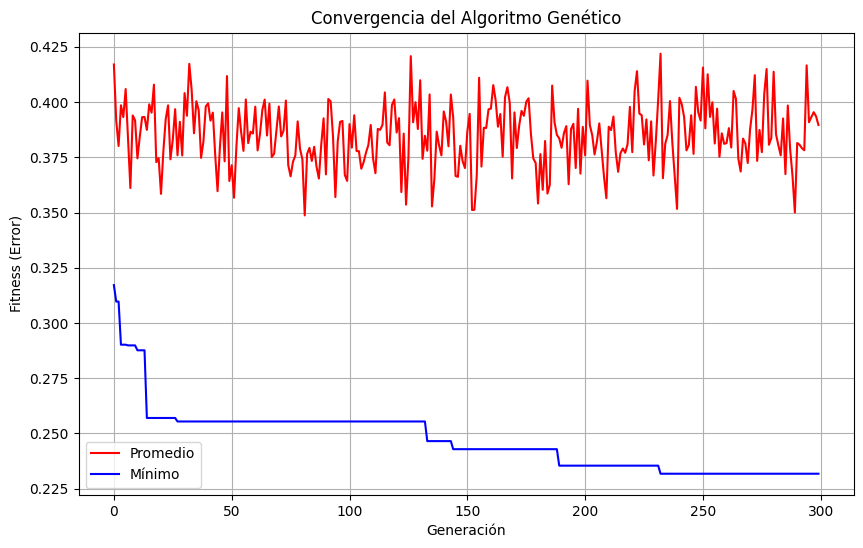

Mejores características seleccionadas: [[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [33]:
import os
model_name = 'xgboost'
mutFlipBit = 0.6
mut_prob = 0.6
cruce_prob = 0.3
path = f"resultados_ga/ga_{model_name}_mutflip_{str(mutFlipBit).replace('.','_')}_mutprob_{str(mut_prob).replace('.','_')}_cpx_{str(cruce_prob).replace('.','_')}"
os.makedirs(path, exist_ok=True)
target_column = 'Valor'
mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column, n_generations=300, population_size=40,
                                       outputpath = path, mutFlipBit=mutFlipBit, mut_prob=mut_prob, cruce_prob=cruce_prob)
fig = plot_convergence(logbook=logbook)
fig.savefig(f'{path}/convergence_plot.png', 
            dpi=300, 
            bbox_inches='tight')

df = final.drop(columns='Valor')
best_solution = hof[0]
features = df.columns
selected_features = get_selected_features(best_solution, features)

print("Mejores características seleccionadas:", mejores_caracteristicas)
print("Mejor fitness:", hof[0].fitness.values[0])

output_file = f"{path}/resultados.txt"

with open(output_file, 'w') as f:
    f.write('Features seleccionadas\n')
    for feature in selected_features:
        f.write(feature + '\n')
    f.write(f'Mejor Fitness: {hof[0].fitness.values[0]}')

print(f"Resultados guardados en {output_file}")

In [12]:
len(mejores_caracteristicas[0])

45

In [13]:
carac = len(hof[0])
df = final.drop(columns='Valor')

In [14]:
def get_selected_features(binary_vector, feature_names):
    """
    Convert binary vector to list of selected feature names
    
    Args:
        binary_vector: List of 0s and 1s
        feature_names: List of feature names
        
    Returns:
        List of selected feature names
    """
    return [feature for feature, selected in zip(feature_names, binary_vector) if selected == 1]

# Assuming you have the best solution from hof
best_solution = hof[0]  # Get best individual from HallOfFame
#features = ['PIRange_7Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 
#           'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif',
#           'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif',
#           'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif',
#           'valor_humedad_suelo1', 'slope']
features = df.columns
selected_features = get_selected_features(best_solution, features)
print("Selected features:")
for feature in selected_features:
    print(f"- {feature}")

Selected features:
- PIRange_Sand.15-30cm.tif
- ksat_60-100cm.tif
- n_5-15cm.tif
- Bulkd.100-200cm.tif
- Tex_Class.0-5cm.tif
- PP
- valor_humedad_suelo1


In [15]:
#['PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.0-5cm.tif', 'PIRange_Sand.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'alpha_15-30cm.tif', 'alpha_5-15cm.tif', 'AvMoist.100-200cm.tif', 'FC.0-5cm.tif', 'FC.100-200cm.tif', 'ksat_60-100cm.tif', 'n_0-5cm.tif', 'n_5-15cm.tif', 'n_60-100cm.tif', 'PWP.0-5cm.tif', 'theta_s_100-200cm.tif', 'alpha.0-5cm.tif', 'valor_humedad_suelo1', 'slope']

In [16]:
df

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.5-15cm.tif,PIRange_Sand.0-5cm.tif,PIRange_Sand.100-200cm.tif,PIRange_Sand.15-30cm.tif,alpha_0-5cm.tif,...,Bulkd.0-5cm.tif,Bulkd.100-200cm.tif,Bulkd.5-15cm.tif,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.5-15cm.tif,PP,valor_humedad_suelo1,slope
0,0.609,0.689,0.550,22.358000,22.490000,29.282999,36.184998,43.908001,30.825001,0.012,...,0.662,0.782,0.882,8.0,8.0,8.0,4.0,13.532034,0.421875,32.357300
1,0.609,0.689,0.550,22.358000,22.490000,29.282999,36.184998,43.908001,30.825001,0.012,...,0.662,0.782,0.882,8.0,8.0,8.0,4.0,238.139918,0.438995,32.357300
2,0.595,0.753,0.497,23.513000,25.268002,24.007999,36.636002,47.190002,31.510998,0.006,...,0.700,0.899,0.766,8.0,8.0,7.0,7.0,32.059045,0.520004,37.497812
3,0.589,0.682,0.498,25.056000,25.813000,26.689999,34.499001,37.794998,31.039001,0.005,...,0.836,1.006,0.967,10.0,1.0,9.0,1.0,0.000000,0.478973,36.717389
4,0.659,0.689,0.553,21.844999,18.743000,21.226999,36.883003,42.296001,31.253002,0.013,...,0.897,0.832,0.954,8.0,4.0,8.0,8.0,2.191190,0.438095,60.517945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,0.604,0.687,0.512,25.153999,24.527000,27.872997,36.001999,45.047001,30.672001,0.006,...,0.998,0.905,1.030,2.0,2.0,2.0,1.0,48.621181,0.437820,42.533329
3144,0.587,0.701,0.556,25.213001,24.993999,26.219002,36.520000,46.927998,31.712999,0.004,...,0.741,1.039,0.975,2.0,2.0,2.0,2.0,66.050648,0.436722,42.533329
3145,0.587,0.701,0.556,25.213001,24.993999,26.219002,36.520000,46.927998,31.712999,0.004,...,0.741,1.039,0.975,2.0,2.0,2.0,2.0,66.050648,0.436722,42.533329
3146,0.587,0.701,0.556,25.213001,24.993999,26.219002,36.520000,46.927998,31.712999,0.004,...,0.741,1.039,0.975,2.0,2.0,2.0,2.0,163.471828,0.438995,42.533329


In [2]:
import pandas as pd
df = pd.read_csv('resultados_generaciones_ga__mutflip_03_mutp_04_cpx_02_xgboost_pen_100.csv')
df

,PIRange_Bulkd.0-5cm.tif,PIRange_Bulkd.100-200cm.tif,PIRange_Bulkd.5-15cm.tif,PIRange_Clay.0-5cm.tif,PIRange_Clay.15-30cm.tif,PIRange_Clay.5-15cm.tif,PIRange_Sand.0-5cm.tif,PIRange_Sand.100-200cm.tif,PIRange_Sand.15-30cm.tif,alpha_0-5cm.tif,...,Bulkd.0-5cm.tif,Bulkd.100-200cm.tif,Bulkd.5-15cm.tif,Tex_Class.0-5cm.tif,Tex_Class.100-200cm.tif,Tex_Class.15-30cm.tif,Tex_Class.5-15cm.tif,PP,valor_humedad_suelo1,slope
0,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1,1,1,1,1,0,0,1,1,1,0,...,1,0,0,0,1,0,0,1,1,1
2,0,0,1,0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,1,1,1
3,0,1,0,0,1,1,1,0,0,1,...,0,1,1,0,1,0,1,0,1,1
4,0,1,1,1,1,1,0,1,1,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1,1,1,1,1,0,0,1,1,0,...,1,1,0,0,0,0,0,1,1,1
11996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
11997,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
11998,0,1,0,0,1,0,0,0,1,0,...,1,1,1,1,0,1,1,0,1,0


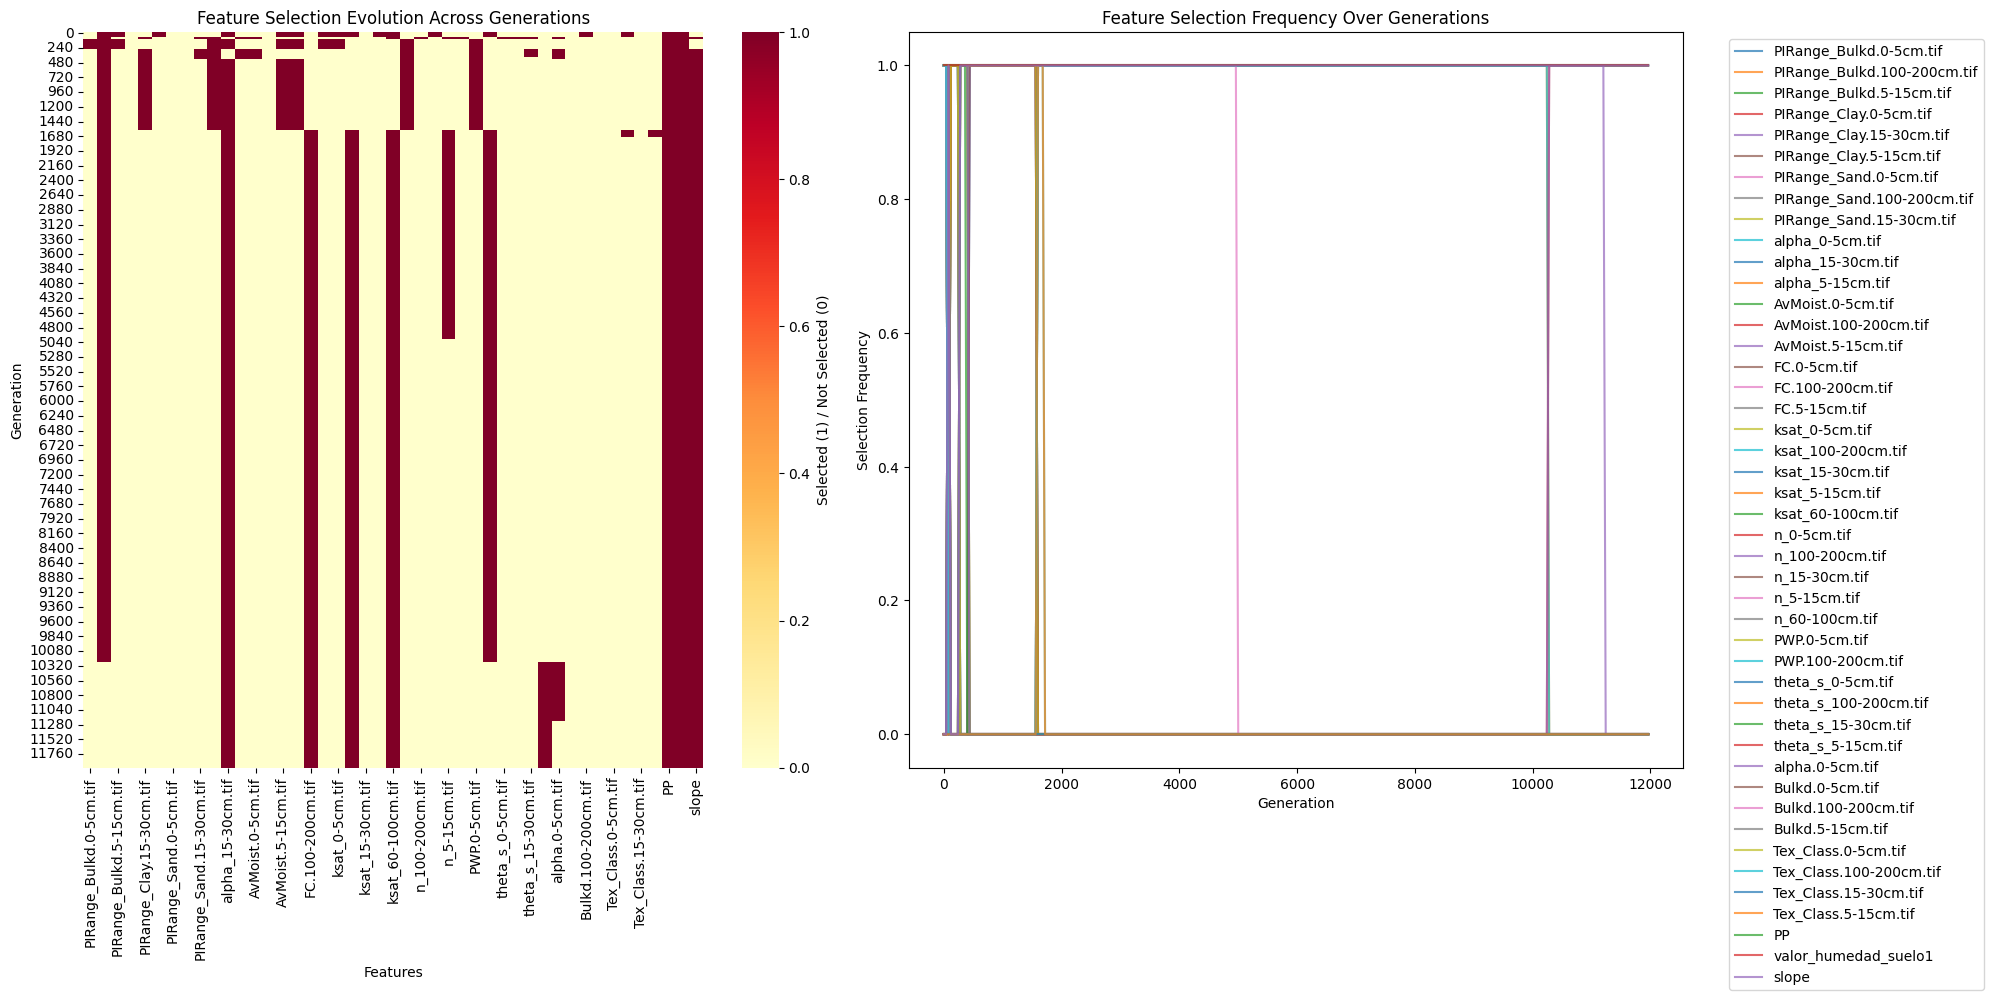

<Figure size 1500x500 with 0 Axes>

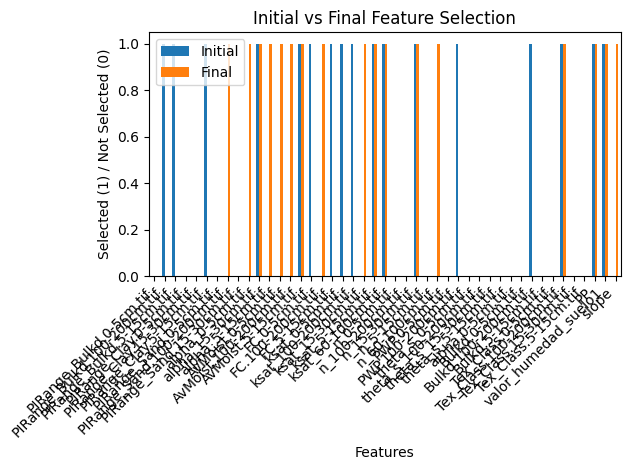

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read generations dat

# Create figure with subplots
plt.figure(figsize=(20, 10))

# 1. Heatmap of feature evolution
plt.subplot(1, 2, 1)
first_individuals = df.iloc[::40]  # Get first individual of each generation
sns.heatmap(first_individuals, 
            cmap='YlOrRd',
            cbar_kws={'label': 'Selected (1) / Not Selected (0)'})
plt.title('Feature Selection Evolution Across Generations')
plt.xlabel('Features')
plt.ylabel('Generation')

# 2. Line plot showing feature selection frequency
plt.subplot(1, 2, 2)
feature_freq = df.mean()
generations = np.arange(0, len(df), 40)
feature_evolution = pd.DataFrame({
    feature: df[feature].iloc[generations].values 
    for feature in df.columns
})

for feature in feature_evolution.columns:
    plt.plot(generations, feature_evolution[feature], 
             label=feature, alpha=0.7)
plt.title('Feature Selection Frequency Over Generations')
plt.xlabel('Generation')
plt.ylabel('Selection Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# 3. Initial vs Final feature comparison
plt.figure(figsize=(15, 5))
initial_selection = df.iloc[0]
final_selection = df.iloc[-1]
comparison = pd.DataFrame({
    'Initial': initial_selection,
    'Final': final_selection
})
comparison.plot(kind='bar')
plt.title('Initial vs Final Feature Selection')
plt.xlabel('Features')
plt.ylabel('Selected (1) / Not Selected (0)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_10151/540103865.py:35: UserWarning:

FixedFormatter should only be used together with FixedLocator



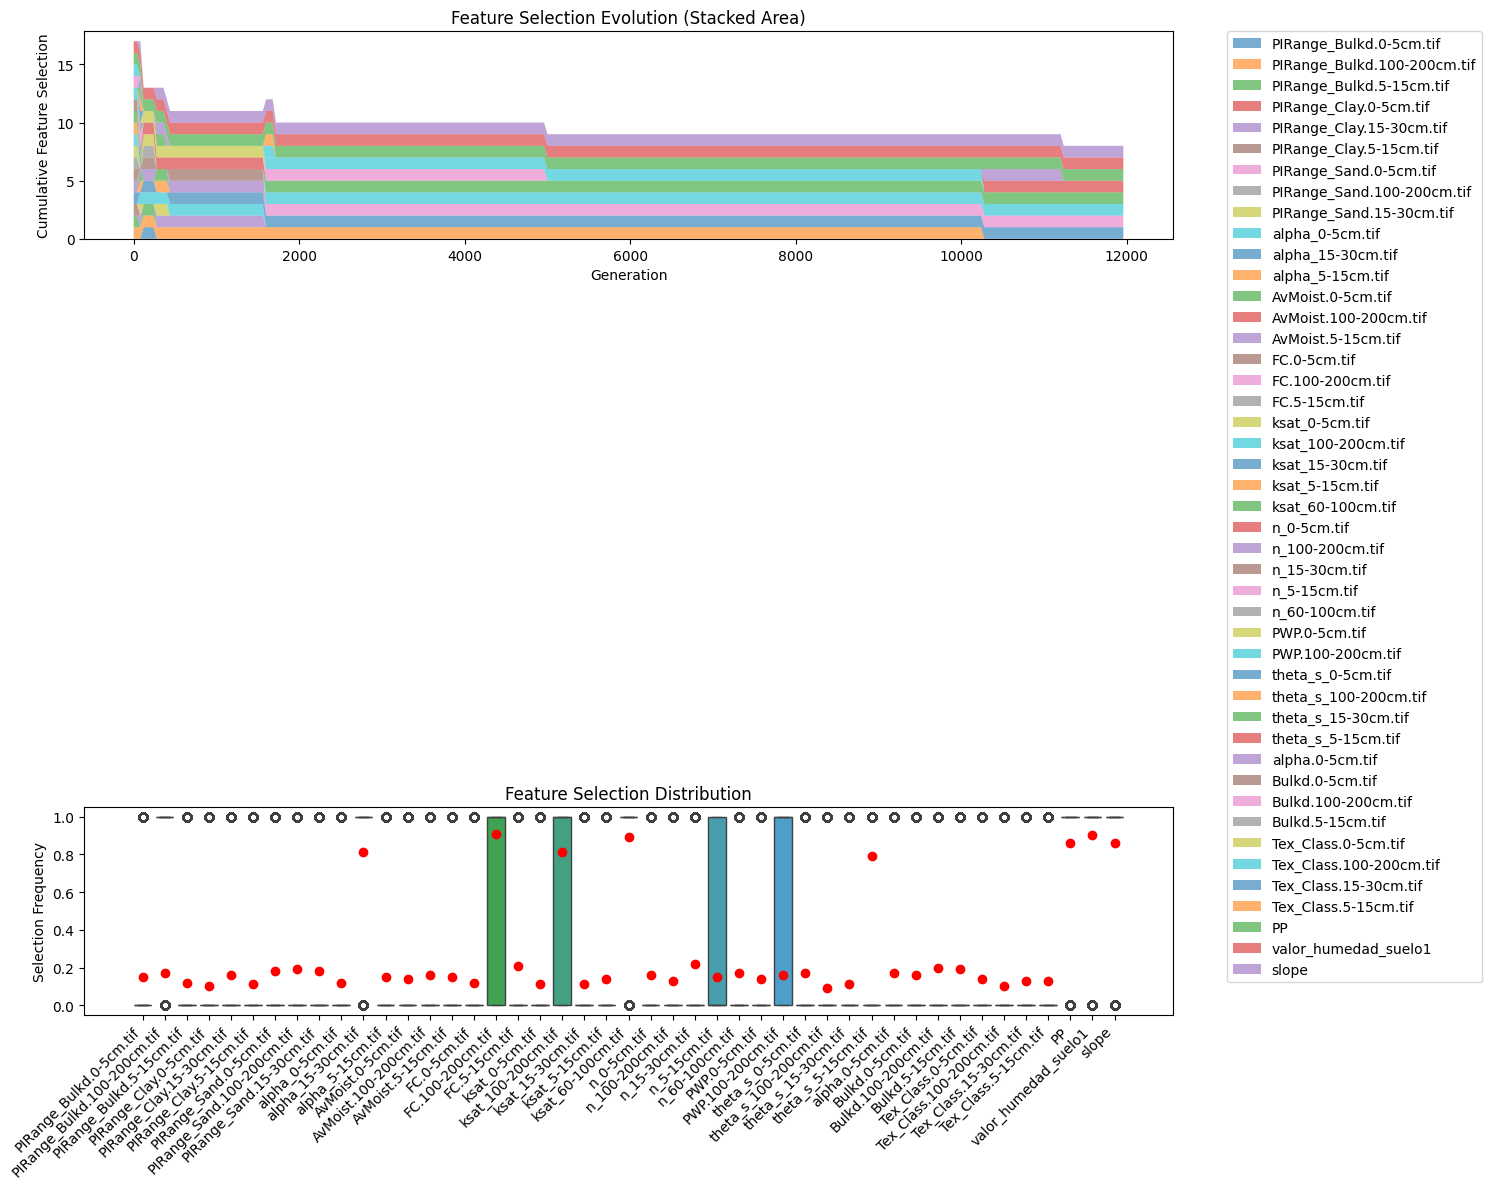


Feature Selection Summary:
                             Mean Selection Rate  Final Selection  \
PIRange_Bulkd.0-5cm.tif                    0.153                0   
PIRange_Bulkd.100-200cm.tif                0.756                0   
PIRange_Bulkd.5-15cm.tif                   0.158                0   
PIRange_Clay.0-5cm.tif                     0.145                0   
PIRange_Clay.15-30cm.tif                   0.226                0   
PIRange_Clay.5-15cm.tif                    0.145                0   
PIRange_Sand.0-5cm.tif                     0.145                0   
PIRange_Sand.100-200cm.tif                 0.149                1   
PIRange_Sand.15-30cm.tif                   0.162                0   
alpha_0-5cm.tif                            0.234                1   
alpha_15-30cm.tif                          0.833                1   
alpha_5-15cm.tif                           0.164                1   
AvMoist.0-5cm.tif                          0.164                1   
AvMois

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Create figure for multiple plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# 1. Stacked Area Plot
generations = np.arange(0, len(df), 40)
feature_evolution = pd.DataFrame({
    feature: df[feature].iloc[generations].values 
    for feature in df.columns
})

ax1.stackplot(generations, 
             feature_evolution.values.T,
             labels=feature_evolution.columns,
             alpha=0.6)
ax1.set_title('Feature Selection Evolution (Stacked Area)')
ax1.set_xlabel('Generation')
ax1.set_ylabel('Cumulative Feature Selection')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# 2. Box Plot with Rolling Average
window = 100  # Rolling window size
rolling_means = df.rolling(window=window).mean()

sns.boxplot(data=df, ax=ax2)
for i, col in enumerate(df.columns):
    ax2.plot(i, rolling_means[col].iloc[-1], 'ro', label='Final Rolling Mean' if i == 0 else '')

ax2.set_title('Feature Selection Distribution')
ax2.set_xticklabels(df.columns, rotation=45, ha='right')
ax2.set_ylabel('Selection Frequency')

plt.tight_layout()
plt.show()

# Additional summary statistics
print("\nFeature Selection Summary:")
summary = pd.DataFrame({
    'Mean Selection Rate': df.mean(),
    'Final Selection': df.iloc[-1],
    'Selection Stability': df.std()
}).round(3)
print(summary)

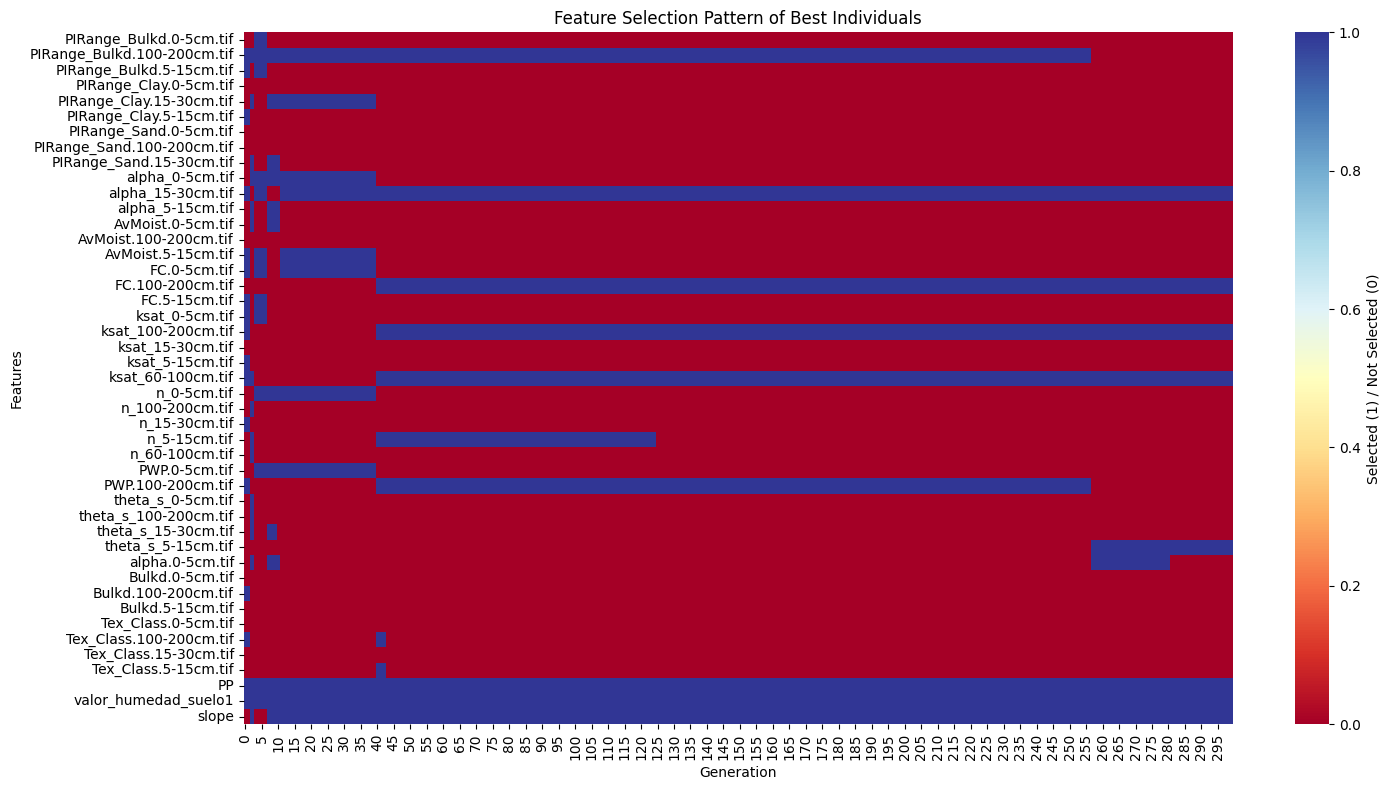


Best Individuals Feature Selection Summary:
                             Selection Frequency  First Generation  \
PIRange_Bulkd.0-5cm.tif                    0.013                 0   
PIRange_Bulkd.100-200cm.tif                0.857                 1   
PIRange_Bulkd.5-15cm.tif                   0.020                 1   
PIRange_Clay.0-5cm.tif                     0.000                 0   
PIRange_Clay.15-30cm.tif                   0.113                 0   
PIRange_Clay.5-15cm.tif                    0.007                 1   
PIRange_Sand.0-5cm.tif                     0.000                 0   
PIRange_Sand.100-200cm.tif                 0.000                 0   
PIRange_Sand.15-30cm.tif                   0.017                 0   
alpha_0-5cm.tif                            0.127                 0   
alpha_15-30cm.tif                          0.983                 1   
alpha_5-15cm.tif                           0.017                 0   
AvMoist.0-5cm.tif                          0.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get best individual from each generation (first row of each 40)
best_individuals = df.iloc[::40].reset_index(drop=True)

# Create figure
plt.figure(figsize=(15, 8))

# Create heatmap
sns.heatmap(best_individuals.T, 
            cmap='RdYlBu',
            cbar_kws={'label': 'Selected (1) / Not Selected (0)'},
            yticklabels=best_individuals.columns,)


# Set titles and labels
plt.title('Feature Selection Pattern of Best Individuals')
plt.xlabel('Generation')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

# Print summary statistics for best individuals
print("\nBest Individuals Feature Selection Summary:")
summary = pd.DataFrame({
    'Selection Frequency': best_individuals.mean(),
    'First Generation': best_individuals.iloc[0],
    'Last Generation': best_individuals.iloc[-1]
}).round(3)
print(summary)